In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np


In [ ]:
img_path = "Y20.jpg"
image = cv2.imread(img_path)
print(" width: {} pixels ".format(image.shape[1]))
print(" height: {} pixels ".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))


 width: 240 pixels 
 height: 300 pixels 
channels: 3


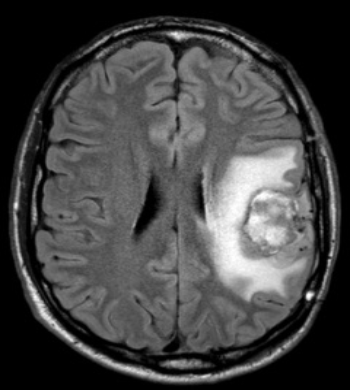

In [ ]:
dim=(350,390)
image=cv2.resize(image, dim)
cv2_imshow(image)

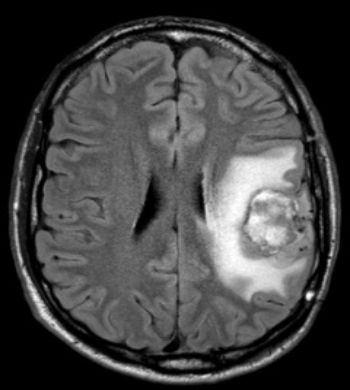

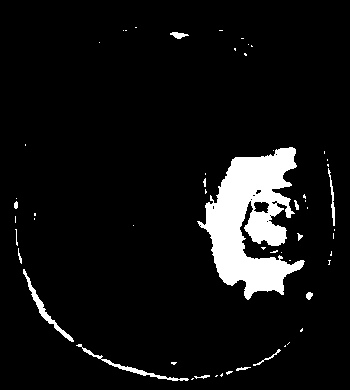

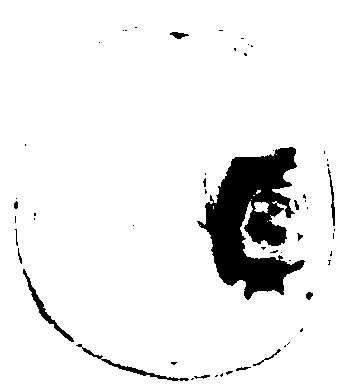

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)

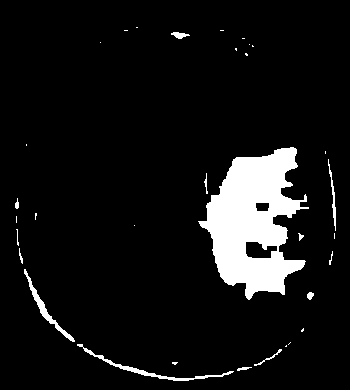

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

In [ ]:
closed = cv2.erode(closed, None, iterations = 14)
closed = cv2.dilate(closed, None, iterations = 13)

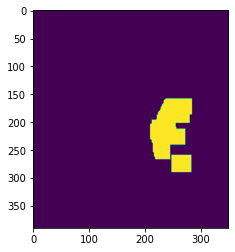

In [ ]:
plt.imshow(closed)

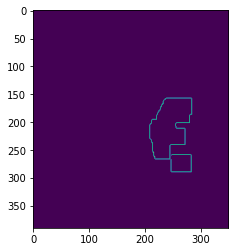

In [ ]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_canny(closed)
plt.imshow(canny)

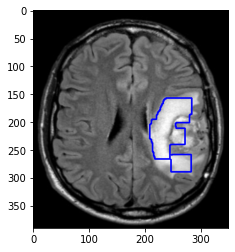

In [ ]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
plt.imshow(image)